In [179]:
import pandas as pd
import plotly.express as px
import numpy as np
import os
from collections import defaultdict
from collections import Counter
import matplotlib.pyplot as plt
import pickle


import psutil
psutil.cpu_count()
p = psutil.Process()
p.cpu_affinity([0,1,2,3,4,5,6,7,8,9,10,11])

os.chdir(r'H:\all\RL_Shrinkage_2024')
from helpers import helper_functions as hf
from ONE_YR_long_only.NonLinear_Shrinkage import regression_evaluation_funcs as re_hf
from helpers import eval_function_new


In [180]:
PF_SIZE = 500


base_folder_path = r'H:\\all\\RL_Shrinkage_2024'
# IMPORT SHRK DATASETS
pf_size = PF_SIZE  # DONT CHANGE HERE!!
permnos = pd.read_pickle(
    fr"{base_folder_path}\ONE_YR_long_only\preprocessing\rets_permnos_1Y\permnos_1Y_p{pf_size}.pickle")
rets_full = pd.read_pickle(
    fr"{base_folder_path}\ONE_YR_long_only\preprocessing\rets_permnos_1Y\returns_full_1Y_p{pf_size}.pickle")


fixed_shrk_name = 'cov1Para'
opt_shrk_name = 'cov1Para'
with open(rf"{base_folder_path}\ONE_YR_long_only\preprocessing\training_dfs\PF{pf_size}\fixed_shrkges_{fixed_shrk_name}_p{pf_size}.pickle", 'rb') as f:
    fixed_shrk_data = pickle.load(f)
with open(rf"{base_folder_path}\ONE_YR_long_only\preprocessing\training_dfs\PF{pf_size}\{opt_shrk_name}_factor-1.0_p{pf_size}.pickle", 'rb') as f:
    optimal_shrk_data = pickle.load(f)

with open(rf"{base_folder_path}\ONE_YR_long_only\preprocessing\training_dfs\PF{pf_size}\fixed_shrkges_rawres_{fixed_shrk_name}_p{pf_size}.pickle", 'rb') as f:
    rawres_fixed_shrk_data = pickle.load(f)

# IMPORT FACTORS DATA AND PREPARE FOR FURTHER USE
factor_path = fr"{base_folder_path}\helpers"
factors = pd.read_csv(factor_path + "/all_factors.csv")
factors = factors.pivot(index="date", columns="name", values="ret")

# as our shrk data starts from 1980-01-15 our factors data should too
start_date = str(optimal_shrk_data['date'].iloc[0])
start_date = start_date[0:4] + '-' + start_date[4:6] + "-" + start_date[6:]
start_idx = np.where(factors.index == start_date)[0][0]
factors = factors.iloc[start_idx:start_idx+fixed_shrk_data.shape[0], :]

cov1para_shrk = optimal_shrk_data['shrk_factor'].values[5040:]

len_train = 5040
end_date = fixed_shrk_data.shape[0]
val_indices_correct = (len_train, end_date)
val_indices_results = [val_indices_correct[0] + 21 * i for i in range((val_indices_correct[-1] - val_indices_correct[0]) // 21)]
val_idxes_shrkges = [0 + 21 * i for i in range((val_indices_correct[-1] - val_indices_correct[0]) // 21)]

In [181]:
sd=rawres_fixed_shrk_data.loc[:, 0.00].iloc[5040:].std()*np.sqrt(252)*100

av=rawres_fixed_shrk_data.loc[:, 0.00].iloc[5040:].mean()*(252)*100

ir=av/sd

print(f"Res for SAMPLE: AV: {av}, SD: {sd}, IR: {ir}")

Res for SAMPLE: AV: 9.294607665257546, SD: 12.099993419361219, IR: 0.7681498115846269


In [182]:
optimal_shrk_data['shrk_factor'].astype(np.float64).round(2)
x = np.diag(rawres_fixed_shrk_data.loc[:, optimal_shrk_data['shrk_factor'].astype(np.float64).round(2)])[5040:]

sd = x.std() * np.sqrt(252) * 100
av = x.mean() * (252) * 100
ir = av/sd

print(f" AV: {av} \n SD: {sd} \n IR: {ir}")

 AV: 9.574585595434982 
 SD: 12.134814889582799 
 IR: 0.7890178533876392


In [183]:
fixed_shrk_data

,date,hist_vola,0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,...,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1.0
1,19810112,0,8.964373,0.083826,0.081168,0.078831,0.07675,0.07488,0.073186,0.07164,...,0.062032,0.063921,0.066205,0.069022,0.072583,0.077225,0.083522,0.092518,0.106314,0.129775
2,19810113,0,0.759256,0.07938,0.076945,0.074807,0.072907,0.071201,0.069655,0.068245,...,0.060729,0.062663,0.065003,0.06789,0.071539,0.076293,0.082732,0.091911,0.105952,0.129759
3,19810114,0,13.807855,0.082849,0.080217,0.077919,0.075883,0.07406,0.072413,0.070913,...,0.059057,0.060952,0.063272,0.066163,0.069855,0.074707,0.081329,0.090829,0.10543,0.130282
4,19810115,0,1.406829,0.080466,0.078048,0.075931,0.074051,0.072363,0.070834,0.069438,...,0.059008,0.060928,0.063274,0.066194,0.069917,0.074801,0.081455,0.090979,0.105587,0.130407
5,19810116,0,0.760683,0.084101,0.081773,0.079713,0.07787,0.076205,0.07469,0.073302,...,0.061517,0.063416,0.065734,0.068618,0.072284,0.077079,0.08358,0.092829,0.106903,0.130581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10349,20220125,0,9.820783,0.127751,0.125733,0.12406,0.12263,0.121385,0.120284,0.119301,...,0.136415,0.138677,0.141331,0.144508,0.148416,0.153395,0.160066,0.169708,0.185484,0.218135
10350,20220126,0,115.962323,0.124658,0.121902,0.119663,0.117795,0.116204,0.114829,0.113629,...,0.132269,0.134632,0.137419,0.140776,0.144934,0.150275,0.157488,0.167979,0.185185,0.220522
10351,20220127,0,0.8677,0.126226,0.124282,0.122736,0.121474,0.120426,0.119545,0.118797,...,0.152134,0.154661,0.157594,0.161067,0.165289,0.170605,0.177639,0.187665,0.203825,0.236834
10352,20220128,0,34.682452,0.122249,0.119434,0.117224,0.115443,0.113983,0.112773,0.111762,...,0.151036,0.153693,0.156757,0.160361,0.164707,0.170127,0.177216,0.187184,0.203008,0.234909


In [184]:
px.line(fixed_shrk_data.iloc[:, 2:].copy().astype(float).rolling(63).mean().dropna().idxmin(axis=1).astype(float))

In [185]:
a = rawres_fixed_shrk_data.rolling(window=21, step=21).std().bfill()*np.sqrt(252)
a = a.idxmin(axis=1)
a_full = np.repeat(a,21)

px.line(a_full)

In [221]:
a.iloc[5040:].mean()

rawres_fixed_shrk_data.loc[:, 0.01].iloc[5040:].std()*np.sqrt(252)*100

np.float64(12.07824410439627)

In [225]:
px.line(rawres_fixed_shrk_data.iloc[:5040].std()*np.sqrt(252)*100)

In [226]:
all_res = rawres_fixed_shrk_data.rolling(window=21, min_periods=1).std().bfill()*np.sqrt(252) * 100
all_factors = fixed_shrk_data.iloc[:, 2:].columns.astype(float).values
Y = all_res.idxmin(axis=1).values.astype(float)

"""
Y = Y[list(range(0, all_res.shape[0], 21))]
Y = np.repeat(Y, 21)
"""

#Y = a

opt_values = all_res.idxmin(axis=1).values.astype(float)[:-21]
opt_values = np.insert(arr=opt_values, obj=0, values=np.repeat(0.15, 21))

# old: Y = np.array(re_hf.map_factors_to_preds(Y.reshape(-1), all_factors))
Y = np.array(re_hf.map_factors_to_preds(Y, all_factors))

opt_values = np.array(re_hf.map_factors_to_preds(opt_values, all_factors))
opt_v3 = np.diag(all_res.loc[:, all_res.idxmin(axis=1).values])[:-21]
opt_v3 = np.insert(arr=opt_v3, obj=0, values=np.repeat(7.0, 21))

rolling_opt = pd.Series(opt_values).rolling(window=252, min_periods=1).mean().values
rolling_opt2 = pd.Series(opt_v3).rolling(window=252, min_periods=1).mean().values


ROLL_WINDOW = 1
ROLL_WINDOW_INPUTS = 252
rolling_opt = pd.Series(opt_values).rolling(window=ROLL_WINDOW_INPUTS, min_periods=1).mean().values
rolling_opt2 = pd.Series(opt_v3).rolling(window=ROLL_WINDOW_INPUTS, min_periods=1).mean().values

Y = pd.Series(Y).rolling(window=1, min_periods=1).mean().astype(np.int64).values
opt_values = pd.Series(opt_values).rolling(window=1, min_periods=1).mean().astype(np.int64).values



In [204]:
opt_new = all_res.idxmin(axis=1).values.astype(float)[:-21]
opt_new = np.insert(arr=opt_new, obj=0, values=np.repeat(0.15, 21))
opt_new = opt_new[list(range(0, opt_new.shape[0], 21))]
opt_new = np.repeat(opt_new, 21)

ROLL_WINDOW = 1
ROLL_WINDOW_INPUTS = 252
rolling_opt_new = pd.Series(opt_new).rolling(window=ROLL_WINDOW_INPUTS, min_periods=1).mean().values

In [205]:
params = {
'pf_size' : pf_size,
'opt_values_factors' : opt_values,
'include_ts_momentum_var_allstocks': False,
'include_ts_momentum_allstocks': True,
'include_sample_covmat_trace': True,
'include_mean_of_correls': True,
'include_iqr': False,
'include_factors': False,
'include_ewma_year': False,
'include_ewma_month': True,
'include_ew_year_vola': False,
'include_ew_month_vola': True,
'include_allstocks_year_avgvola': True,
'include_allstocks_month_avgvola': False,
    'additional_inputs' : [opt_v3, opt_new, rolling_opt_new, rolling_opt, rolling_opt2, optimal_shrk_data['shrk_factor'].values.astype(np.float64)*100]  
}

X = re_hf.load_additional_train_data(**params)

In [206]:
TRAIN_SPECIAL=False

if TRAIN_SPECIAL is True:
    print("##########\n")
    print("TRAINING WITH WEIGTED AVG OF c1p and ORACLE Y")
    Y = optimal_shrk_data['shrk_factor'].values.astype(np.float64)*100*0.5 + Y*0.5

else:
    print("##########\n")
    print("TRAINING WITH ORACLE Y ONLY")
    

##########

TRAINING WITH ORACLE Y ONLY


In [247]:
min(Y)

np.int64(0)

In [248]:
in_sample_sds = (rawres_fixed_shrk_data.iloc[:5040].std()*np.sqrt(252)*100).values

in_sample_fixed_map = dict((i, in_sample_sds[i-1]) for i in range(0,101,1))

In [249]:
in_sample_fixed_map



{0: np.float64(15.04501214872776),
 1: np.float64(8.918620548420595),
 2: np.float64(8.905317900321249),
 3: np.float64(8.883019805072607),
 4: np.float64(8.879819717404025),
 5: np.float64(8.878967325142174),
 6: np.float64(8.879020794388206),
 7: np.float64(8.885893363467565),
 8: np.float64(8.887847705348149),
 9: np.float64(8.906706452333852),
 10: np.float64(8.904467743480248),
 11: np.float64(8.916555859191174),
 12: np.float64(8.921193522237292),
 13: np.float64(8.927063179210602),
 14: np.float64(8.939291228005734),
 15: np.float64(8.94200047580759),
 16: np.float64(8.95016576111677),
 17: np.float64(8.95924933929792),
 18: np.float64(8.964529250995247),
 19: np.float64(8.97479675590526),
 20: np.float64(8.980859744273362),
 21: np.float64(8.99179709943176),
 22: np.float64(9.000620301075303),
 23: np.float64(9.009360455655278),
 24: np.float64(9.019903823759954),
 25: np.float64(9.029419231906548),
 26: np.float64(9.039428198868407),
 27: np.float64(9.04914968402208),
 28: np.

In [250]:
in_sample_fixed_map[64] - 

np.float64(9.579447293880024)

In [207]:
x = all_res.idxmin(axis=1).values.astype(float)
x = x[list(range(0, x.shape[0], 21))]
x = np.repeat(x,21)

(np.diag(rawres_fixed_shrk_data.loc[:, x]))[5040:].std() * np.sqrt(252) * 100

np.float64(12.18072215496348)

In [208]:
x = all_res.idxmin(axis=1).values.astype(float)
(np.diag(rawres_fixed_shrk_data.loc[:, x]))[5040:].std() * np.sqrt(252) * 100

np.float64(11.731802072514153)

### Cross Validation

In [209]:
from sklearn.linear_model import ElasticNet
def general_single_output_ElasticNet_Lagged_CrossValidation(X, Y, len_train, single_train=False, expanding=False, train_size=None, model_params={}):
    model_predictions = []
    if train_size is None:
        train_size = len_train
    for i in range(X.shape[0] // 21):  # is too long which is why we have a if clause
        if len_train + 21*(i+1) > X.shape[0]:
            model_predictions = np.repeat(model_predictions, 21)
            return model_predictions
        else:  # TRAINING
            if single_train == False:
                if expanding == False:
                    x_train = X[len_train - train_size + 21*i : len_train + 21*(i-1), :]
                    y_train = Y[len_train - train_size + 21*i : len_train + 21*(i-1), ]
                else:
                    x_train = X[len_train - train_size : len_train + 21*(i-1), :]
                    y_train = Y[len_train - train_size : len_train + 21*(i-1), ]
                regr = ElasticNet(random_state=123, **model_params)
                regr = regr.fit(x_train, y_train)
            else:
                if i == 0:
                    x_train = X[len_train - train_size + 21 * i: len_train + 21 * (i - 1), :]
                    y_train = Y[len_train - train_size + 21 * i: len_train + 21 * (i - 1), ]
                    regr = ElasticNet(random_state=123, **model_params)
                    regr = regr.fit(x_train, y_train)
            ## TRAINING DONE
            x_test = X[len_train + 21 * (i - 1):len_train + 21 * i, :]
            x_test = np.ascontiguousarray(X[len_train + 21 * i, :].reshape(1, -1))
            preds = regr.predict(x_test)

            preds = np.round(preds, 0)
            model_predictions.append(preds)


def eval_model_outputs_cross_val(res, intensity_of_intensity_list, len_cv_train, len_train):
    res = [len(intensity_of_intensity_list)-1 if r > len(intensity_of_intensity_list) else r for r in res]
    res = [0 if r < 0 else r for r in res]

    Y_eval = rawres_fixed_shrk_data.iloc[len_cv_train:len_train]

    returns = np.diag(Y_eval.iloc[:, res])
    returns_sd = returns.std() * np.sqrt(252) * 100
    returns_means = returns.mean() * 252 * 100

    return returns_means, returns_sd

In [210]:
len_cv_train = int(len_train*0.8) 

train_x_cv = X[:len_cv_train]
train_y_cv = Y[:len_cv_train]

val_x = X[len_cv_train:len_train]
val_y = Y[len_cv_train:len_train]

In [211]:
from sklearn.model_selection import ParameterGrid
model_params_grid = {
    "alpha": [0.1, 0.5, 1.0, 1.5, 2.0, 5.0],
    "l1_ratio": [0.1, 0.25, 0.5, 0.75, 0.9],
    "max_iter": [2000],
    "tol": [1e-3, 1e-4, 1e-5],
    "fit_intercept": [True, False]
}
model_params_grid = list(ParameterGrid(model_params_grid))
intensity_of_intensity_list = all_res.columns
sds = []
for i, p in enumerate(model_params_grid):
    res = general_single_output_ElasticNet_Lagged_CrossValidation(X=X[:len_train], Y=Y[:len_train], len_train=len_cv_train, model_params=p)
    AV, SD = eval_model_outputs_cross_val(res, intensity_of_intensity_list, len_cv_train, len_train)
    sds.append(SD.round(3))
    if i%10 == 0:
        print(f"fitted model {i} / {len(model_params_grid)}")

fitted model 0 / 180
fitted model 10 / 180
fitted model 20 / 180
fitted model 30 / 180
fitted model 40 / 180
fitted model 50 / 180
fitted model 60 / 180
fitted model 70 / 180
fitted model 80 / 180
fitted model 90 / 180
fitted model 100 / 180
fitted model 110 / 180
fitted model 120 / 180
fitted model 130 / 180
fitted model 140 / 180
fitted model 150 / 180
fitted model 160 / 180
fitted model 170 / 180


#### Evaluate best model on OOS data

np.float64(12.239416504042785)

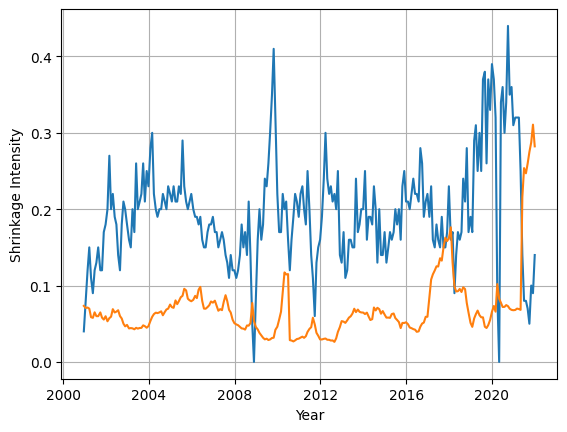

In [197]:
np.argmin(sds)
p_best = model_params_grid[np.argmin(sds)]
res = re_hf.general_single_output_ElasticNet_Lagged(X=X, Y=Y, len_train=len_train, model_params=p_best)
res = [r if r > 0 else 0 for r in res]
res = [r if r < all_factors.shape[0] else all_factors.shape[0]-1 for r in res]

mapped_res = np.array(re_hf.map_preds_to_factors(res, all_factors)).astype(float)
#mapped_res = [ round(i-0.25,2) if i-0.25 >= 0 else i for i in mapped_res ]
#r = eval_function_new.eval_fct_networkonly_1YR(mapped_res, rets_full, permnos, 0, val_indices_results)
#eval_function_new.myplot(mapped_res[val_idxes_shrkges], cov1para_shrk[val_idxes_shrkges])

res_df = pd.DataFrame({"ElasticNet_CVC": mapped_res, "CVC": cov1para_shrk }, index=pd.to_datetime(permnos.index[5040:], format="%Y%m%d") )
res_df = res_df.iloc[list(range(0, 5313, 21)), :]  # because we only may change intensity on every rebalancing date
fig, ax = plt.subplots()
plt.rcParams.update({'font.size': 10})
ax.plot(res_df)
ax.set(xlabel='Year', ylabel='Shrinkage Intensity')
ax.grid()

np.diag(rawres_fixed_shrk_data.iloc[5040:, :].loc[:, mapped_res]).std()*np.sqrt(252)*100

In [198]:
print("OOS L_RL RESULTS:")

sd = np.diag(rawres_fixed_shrk_data.iloc[5040:, :].loc[:, mapped_res]).std()*np.sqrt(252)*100
av = np.diag(rawres_fixed_shrk_data.iloc[5040:, :].loc[:, mapped_res]).mean()*252*100

print("sd: ", sd)
print("ir: ", ir)

OOS L_RL RESULTS:
sd:  12.239416504042785
ir:  0.7890178533876392


In [199]:
px.line(rawres_fixed_shrk_data.iloc[5040:, :].std() * np.sqrt(252) * 100)

# doesnt make sense

brief lgbm testing


fitted model in iteration 0 out of 253
fitted model in iteration 1 out of 253
fitted model in iteration 2 out of 253
fitted model in iteration 3 out of 253
fitted model in iteration 4 out of 253
fitted model in iteration 5 out of 253
fitted model in iteration 6 out of 253
fitted model in iteration 7 out of 253
fitted model in iteration 8 out of 253
fitted model in iteration 9 out of 253
fitted model in iteration 10 out of 253
fitted model in iteration 11 out of 253
fitted model in iteration 12 out of 253
fitted model in iteration 13 out of 253
fitted model in iteration 14 out of 253
fitted model in iteration 15 out of 253
fitted model in iteration 16 out of 253
fitted model in iteration 17 out of 253
fitted model in iteration 18 out of 253
fitted model in iteration 19 out of 253
fitted model in iteration 20 out of 253
fitted model in iteration 21 out of 253
fitted model in iteration 22 out of 253
fitted model in iteration 23 out of 253
fitted model in iteration 24 out of 253
fitted mod

np.float64(12.227329221608073)

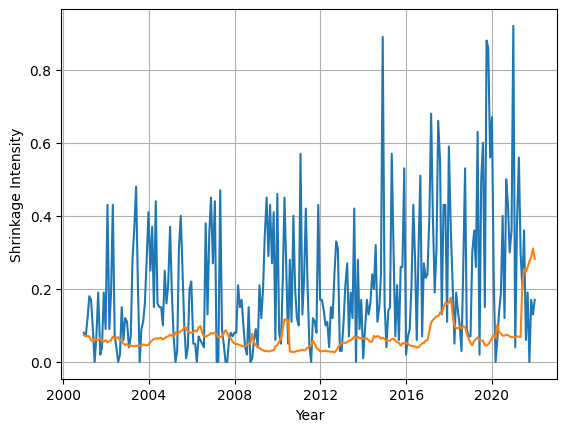

In [200]:
res = re_hf.general_single_output_LGBMRegression_Lagged(X=X, Y=Y, cur_params={"num_leaves":50, "n_estimators": 400, "reg_alpha": 0.5, "reg_lambda": 0.5}, len_train=5040)
res = [r if r > 0 else 0 for r in res]
res = [r if r < all_factors.shape[0] else all_factors.shape[0]-1 for r in res]
mapped_res = np.array(re_hf.map_preds_to_factors(res, all_factors)).astype(float)
res_df = pd.DataFrame({"ElasticNet_CVC": mapped_res, "CVC": cov1para_shrk }, index=pd.to_datetime(permnos.index[5040:], format="%Y%m%d") )
res_df = res_df.iloc[list(range(0, 5313, 21)), :]  # because we only may change intensity on every rebalancing date
fig, ax = plt.subplots()
plt.rcParams.update({'font.size': 10})
ax.plot(res_df)
ax.set(xlabel='Year', ylabel='Shrinkage Intensity')
ax.grid()
np.diag(rawres_fixed_shrk_data.iloc[5040:, :].loc[:, mapped_res]).std()*np.sqrt(252)*100

In [202]:
print("LGBM RESULTS")
sd = np.diag(rawres_fixed_shrk_data.iloc[5040:, :].loc[:, mapped_res]).std()*np.sqrt(252)*100
av = np.diag(rawres_fixed_shrk_data.iloc[5040:, :].loc[:, mapped_res]).mean()*252*100

print("sd: ", sd)
print("ir: ", ir)

LGBM RESULTS
sd:  12.227329221608073
ir:  0.7890178533876392


### Save OOS Results of Best model

In [57]:
OUT_PATH = rf"H:\all\RL_Shrinkage_2024\ONE_YR_long_only\Linear_Shrinkage\results\p{PF_SIZE}"
oos_daily_rets = np.diag(rawres_fixed_shrk_data.iloc[5040:, :].loc[:, mapped_res])
pd.Series(oos_daily_rets).to_csv(f"{OUT_PATH}/OOS_daily_returns.csv")

In [58]:
pd.read_csv(OUT_PATH + "/OOS_daily_returns.csv", index_col=0).values.reshape(-1,)

array([ 0.0185481 , -0.00058492, -0.01487173, ...,  0.00230349,
        0.01701414,  0.01262656])

### For Best Model, 
- create grid with AV and SD with convex combinations of the best OOS fixed intensity 
- create our model with the same mean as best OOS fixed intensity

In [59]:
convex_combo_sd = []
convex_combo_av = []
convex_combo_daily_rets = []

OPT_OOS_FIXED_SHRK_DICT = {
    30: 0.13, 
    50: 0.2, 
    100: 0.23, 
    225: 0.24, 
    500: 0.24
    }

OPT_OOS_FIXED_SHRK = OPT_OOS_FIXED_SHRK_DICT[PF_SIZE]
OUT_PATH = rf"H:\all\RL_Shrinkage_2024\ONE_YR_long_only\Linear_Shrinkage\results\p{PF_SIZE}"

for a in list(range(0,11,1)):
    a = a/10   
    x = (np.round((mapped_res * (1-a) + OPT_OOS_FIXED_SHRK * a), 2))
    daily_rets = np.diag(rawres_fixed_shrk_data.iloc[5040:, :].loc[:, x])   
    convex_combo_daily_rets.append(daily_rets)                  
    convex_combo_av.append(daily_rets.mean() * 252 * 100)
    convex_combo_sd.append(daily_rets.std()* np.sqrt(252) * 100)

convex_combo_av = pd.DataFrame(convex_combo_av, index=[i/10 for i in range(0,11)], columns=[PF_SIZE]).T
convex_combo_sd = pd.DataFrame(convex_combo_sd, index=[i/10 for i in range(0,11)], columns=[PF_SIZE]).T
convex_combo_daily_rets = pd.DataFrame(convex_combo_daily_rets, index=[i/10 for i in range(0,11)]).T

In [60]:
x = np.round(mapped_res * (OPT_OOS_FIXED_SHRK/np.mean(mapped_res)), 2)
x = [x if x<1 else 1 for x in x]
daily_rets = np.diag(rawres_fixed_shrk_data.iloc[5040:, :].loc[:, x])
convex_combo_av['re-scaled'] = daily_rets.mean() * 252 * 100
convex_combo_sd['re-scaled'] = daily_rets.std()* np.sqrt(252) * 100
convex_combo_daily_rets['re-scaled'] = daily_rets

convex_combo_av.to_csv(OUT_PATH + "/Convex_Combo_AV.csv")
convex_combo_sd.to_csv(OUT_PATH + "/Convex_Combo_SD.csv")
convex_combo_daily_rets.to_csv(OUT_PATH + "/Convex_Combo_DailyReturns.csv")

In [61]:
pd.read_csv(OUT_PATH + "/Convex_Combo_SD.csv", index_col=0)

,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,re-scaled
500,12.134072,12.146268,12.163574,12.188342,12.204689,12.222545,12.240786,12.261861,12.280674,12.298478,12.319458,12.221261


### save oralce and shrinkage intensities of model 

In [62]:
### get oracle
OOS_Rebdates_indexer = list(range(0, 5313, 21))
oracle_min_idx = all_res.iloc[5040:].iloc[OOS_Rebdates_indexer].idxmin(axis=1).astype(np.float64)
oracle_min_idx_repeated = np.repeat(oracle_min_idx, 21).values
oracle_daily_oos_rets = np.diag(rawres_fixed_shrk_data.iloc[5040:, ].loc[:, oracle_min_idx_repeated])

In [63]:
px.line(rawres_fixed_shrk_data.iloc[5040:, ].std() * np.sqrt(252)  *100)

In [64]:
pd.Series(mapped_res, dtype=np.float64).to_csv(OUT_PATH + f"/oos_linear_model_intensity_p{PF_SIZE}.csv")
pd.Series(oracle_min_idx_repeated).to_csv(OUT_PATH + f"/oos_linear_oracle_intensity_p{PF_SIZE}.csv")
pd.Series(oracle_daily_oos_rets).to_csv(OUT_PATH + f"/oos_linear_oracle_dailyrets_p{PF_SIZE}.csv")

In [65]:
# done